<hr style="color:blue">

# <span style="color:cyan"><center> Red Neuronal Convoluvional para Clasifición de Imágenes
### <center>Vamos a construir un red que puede clasificar imágenes de perros y gatos.
El archivo consta de 2500 imágenes, 12500 de perros y 12500 de gatos.

En este programa vamos a emplear 1000 imágenes de gatos para entrenar, 500 para validar y 1000 para prueba. Lo mismo para el caso de las imágenes de perros.
<hr style="color:blue">

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias para ver y generar las imágenes
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

# <span style="color:cyan"> Paso 1: Crear el DataSet para entrenar vlaidar y prueba.

In [7]:
import os, shutil, pathlib

# Dónde están las imágenes fuente:
path_original=pathlib.Path("train")

# Donde colocaremos las imágenes seleccionadas:
path_nueva=pathlib.Path("catdog_small")

# Creamos una función que crea las carpetas de entrenamiento, validación y prueba:
def make_carpetas(sub_set_name, inicio, final):
    for categoria in ("cat","dog"):
        dir=path_nueva/sub_set_name/categoria
        os.makedirs(dir)
        archivos=[f"{categoria}.{i}.jpg" for i in np.arange(inicio,final)]
        for imagenes in archivos:
            shutil.copyfile(src=path_original/imagenes, dst=dir/imagenes)

# Creamos las carpetas:
make_carpetas("train",0,1000)   # Puede modificarse dependiendo el rando de imagenes deseadas
make_carpetas("validation",1000,1500)
make_carpetas("test",1500,2500)

# <span style="color:cyan"> Paso 2: Preprocesamiento de las imágenes.

In [14]:
# Vamos a reducir el tamaño de las imagenes a una escala de 180 x 180 x 3
from keras.utils import image_dataset_from_directory

train_data=image_dataset_from_directory("catdog_small/train/", image_size=(180,180), batch_size=32)
validation_data=image_dataset_from_directory("catdog_small/validation/", image_size=(180,180), batch_size=32)
test_data=image_dataset_from_directory("catdog_small/test/", image_size=(180,180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


# <span style="color:cyan"> Paso 3: Definimos la arquitectura del modelo .

In [15]:
from keras import layers    

# Esto es equivalente a crear un modelo secuencial:
inputs=keras.Input(shape=(180,180,3))    # Definimos la dimensión de las imágenes de entrada
X=layers.Rescaling(1.0/255)(inputs)      # Reescalamos a 0,1
X=layers.Conv2D(filters=32,kernel_size=3,activation="relu")(X)  # 1er Capa convolucional
X=layers.MaxPooling2D(pool_size=2)(X)       

X=layers.Conv2D(filters=64,kernel_size=3,activation="relu")(X)  # 2da Capa convolucional
X=layers.MaxPooling2D(pool_size=2)(X)      

X=layers.Conv2D(filters=128,kernel_size=3,activation="relu")(X)  # 3er Capa convolucional
X=layers.MaxPooling2D(pool_size=2)(X)

X=layers.Conv2D(filters=256,kernel_size=3,activation="relu")(X)  # 1er Capa convolucional
X=layers.MaxPooling2D(pool_size=2)(X)

X=layers.Flatten()(X)

outputs=layers.Dense(units=1,activation="sigmoid")(X)

Modelo=keras.Model(inputs=inputs,outputs=outputs)
Modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

# <span style="color:cyan"> Paso 4: Compilación del modelo.

In [16]:
Modelo.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics="accuracy")

### Una cosa que puede pasar es que un buen modelo se puede obtener en alguna de las etapas de entranamiento, pero como el algoritmo opera hasta el numero de epocas establecido, entonces ese modelo se pierde. Para tenerlo presente lo podemos ir guardando en alguna parte de la siguiemte manera.

In [19]:
# Con esta instruccion, durante el proceso de entrenamiento si encuentra un buen modelo lo va a guardar en la ruta especificada
callbacks=[keras.callbacks.ModelCheckpoint(filepath="ConvNet_Simple", save_best_only=True, monitor="val_loss")]     # Garda el mejor modelo que minimiza la perdida en el conjunto de validación.

# <span style="color:cyan"> Paso 5: Entrenamiento del modelo.

In [20]:
historial=Modelo.fit(train_data, epochs=30, validation_data=validation_data, callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.7223 - accuracy: 0.5165

INFO:tensorflow:Assets written to: ConvNet_Simple\assets


INFO:tensorflow:Assets written to: ConvNet_Simple\assets


63/63 [==============================] - 47s 740ms/step - loss: 0.7223 - accuracy: 0.5165 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.7050 - accuracy: 0.5605

INFO:tensorflow:Assets written to: ConvNet_Simple\assets


INFO:tensorflow:Assets written to: ConvNet_Simple\assets


63/63 [==============================] - 45s 706ms/step - loss: 0.7050 - accuracy: 0.5605 - val_loss: 0.6857 - val_accuracy: 0.5210
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.6613 - accuracy: 0.6220

INFO:tensorflow:Assets written to: ConvNet_Simple\assets


INFO:tensorflow:Assets written to: ConvNet_Simple\assets


63/63 [==============================] - 43s 685ms/step - loss: 0.6613 - accuracy: 0.6220 - val_loss: 0.6620 - val_accuracy: 0.6390
Epoch 4/30
63/63 [==============================] - ETA: 0s - loss: 0.6189 - accuracy: 0.6670

INFO:tensorflow:Assets written to: ConvNet_Simple\assets


INFO:tensorflow:Assets written to: ConvNet_Simple\assets


63/63 [==============================] - 44s 690ms/step - loss: 0.6189 - accuracy: 0.6670 - val_loss: 0.6617 - val_accuracy: 0.6400
Epoch 5/30
63/63 [==============================] - ETA: 0s - loss: 0.5766 - accuracy: 0.7145

INFO:tensorflow:Assets written to: ConvNet_Simple\assets


INFO:tensorflow:Assets written to: ConvNet_Simple\assets


63/63 [==============================] - 43s 686ms/step - loss: 0.5766 - accuracy: 0.7145 - val_loss: 0.6212 - val_accuracy: 0.6750
Epoch 6/30
63/63 [==============================] - ETA: 0s - loss: 0.5481 - accuracy: 0.7285

INFO:tensorflow:Assets written to: ConvNet_Simple\assets


INFO:tensorflow:Assets written to: ConvNet_Simple\assets


63/63 [==============================] - 43s 687ms/step - loss: 0.5481 - accuracy: 0.7285 - val_loss: 0.5678 - val_accuracy: 0.7040
Epoch 7/30
63/63 [==============================] - 44s 691ms/step - loss: 0.5020 - accuracy: 0.7540 - val_loss: 0.6120 - val_accuracy: 0.7070
Epoch 8/30
63/63 [==============================] - ETA: 0s - loss: 0.4619 - accuracy: 0.7850

INFO:tensorflow:Assets written to: ConvNet_Simple\assets


INFO:tensorflow:Assets written to: ConvNet_Simple\assets


63/63 [==============================] - 44s 693ms/step - loss: 0.4619 - accuracy: 0.7850 - val_loss: 0.5667 - val_accuracy: 0.7270
Epoch 9/30
63/63 [==============================] - 43s 678ms/step - loss: 0.4186 - accuracy: 0.8045 - val_loss: 0.6503 - val_accuracy: 0.6990
Epoch 10/30
63/63 [==============================] - ETA: 0s - loss: 0.3955 - accuracy: 0.8215

INFO:tensorflow:Assets written to: ConvNet_Simple\assets


INFO:tensorflow:Assets written to: ConvNet_Simple\assets


63/63 [==============================] - 44s 698ms/step - loss: 0.3955 - accuracy: 0.8215 - val_loss: 0.5560 - val_accuracy: 0.7410
Epoch 11/30
63/63 [==============================] - 45s 707ms/step - loss: 0.3414 - accuracy: 0.8530 - val_loss: 0.6027 - val_accuracy: 0.7330
Epoch 12/30
63/63 [==============================] - 43s 681ms/step - loss: 0.3022 - accuracy: 0.8735 - val_loss: 0.6207 - val_accuracy: 0.7400
Epoch 13/30
63/63 [==============================] - 43s 677ms/step - loss: 0.2603 - accuracy: 0.8945 - val_loss: 0.6506 - val_accuracy: 0.7290
Epoch 14/30
63/63 [==============================] - 45s 706ms/step - loss: 0.2208 - accuracy: 0.9065 - val_loss: 0.7439 - val_accuracy: 0.7320
Epoch 15/30
63/63 [==============================] - 43s 679ms/step - loss: 0.1750 - accuracy: 0.9300 - val_loss: 0.9573 - val_accuracy: 0.7010
Epoch 16/30
63/63 [==============================] - 44s 706ms/step - loss: 0.1703 - accuracy: 0.9360 - val_loss: 0.9136 - val_accuracy: 0.7240
Epoc

# <span style="color:cyan"> Paso 6: Ver el desempeño de las métricas y la función de perdida.

Text(0.5, 1.0, 'Pérdida de entrenamiento vs Validación')

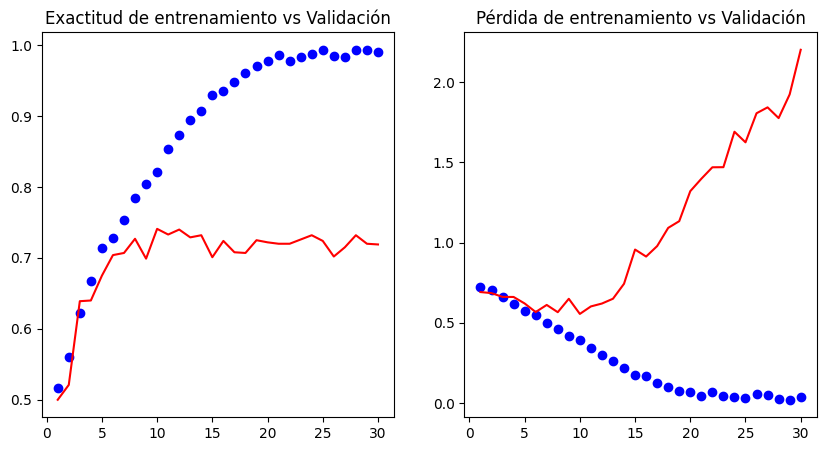

In [29]:
accuracy=historial.history["accuracy"]
val_accuracy=historial.history["val_accuracy"]
loss=historial.history["loss"]
val_loss=historial.history["val_loss"]
epocas=range(1,len(accuracy)+1)

# Graficas
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epocas,accuracy, "bo", label="Exactitud en el conjunto de entrenamiento")
plt.plot(epocas,val_accuracy, "r", label="Exactitud de validación")
plt.title("Exactitud de entrenamiento vs Validación")

plt.subplot(1,2,2)
plt.plot(epocas,loss, "bo", label="Pérdida en el conjunto de entrenamiento")
plt.plot(epocas,val_loss, "r", label="Pérdida de validación")
plt.title("Pérdida de entrenamiento vs Validación")


In [32]:
# Calificamos el mejor modelo en el conjuhnto de prueba
test_model=keras.models.load_model("ConvNet_Simple")
test_loss,test_accuracy=test_model.evaluate(test_data)
print(f"La exactitud en el conjunto deprueba: {test_accuracy:.4}")

63/63 [==============================] - 10s 161ms/step - loss: 0.5685 - accuracy: 0.7420
La exactitud en el conjunto deprueba: 0.742


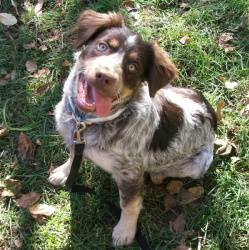

In [104]:
# Como vemos una imagen y como hace la predicción?
name="C:/Users/alber/Escritorio/Machine Learning/Modulo 4/Perros&Gatos/catdog_small/test/dog/dog.1830.jpg"
load_img(name)

In [106]:
imagen=load_img(name,target_size=(180,180)) # Definimos el tamaño de la imagen
imagen=img_to_array(imagen)
imagen.shape

(180, 180, 3)

In [107]:
# Para que esta matriz pase por el modelo que ajustamos:
imagen=np.expand_dims(imagen,axis=0)
imagen=np.vstack([imagen])
b=test_model.predict(imagen)
b   # Probabilidad de que la imagen sea de un perro.   cat (0) , dog(1)

1/1 [==============================] - 0s 28ms/step


array([[0.9999705]], dtype=float32)

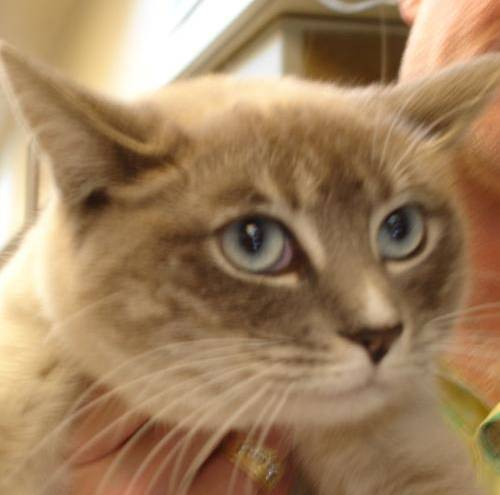

In [97]:
# Ahora con un gato
# Como vemos una imagen y como hace la predicción?
name="C:/Users/alber/Escritorio/Machine Learning/Modulo 4/Perros&Gatos/catdog_small/test/cat/cat.1512.jpg"
load_img(name)

In [100]:
imagen=load_img(name,target_size=(180,180)) # Definimos el tamaño de la imagen
imagen=img_to_array(imagen)

# Para que esta matriz pase por el modelo que ajustamos:
imagen=np.expand_dims(imagen,axis=0)
imagen=np.vstack([imagen])
b=test_model.predict(imagen)
b   # Probabilidad de que la imagen sea de un gato.   cat (0) , dog(1)

1/1 [==============================] - 0s 32ms/step


array([[0.60270923]], dtype=float32)